In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')


In [2]:
# read train 
train = pd.read_csv("train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# read test 
test= pd.read_csv("test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# put labels into y_train variable
Y_train = train["label"]
# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1) 
Y_train.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [5]:
Y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

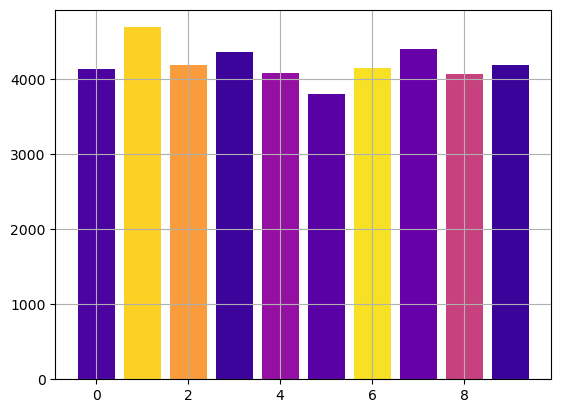

In [6]:
def count_exemple_per_digit(exemples):
    hist = np.ones(10)

    for y in exemples:
        hist[y] += 1

    colors = []
    for i in range(10):
        colors.append(plt.get_cmap('plasma')(np.random.uniform(0.0,1.0,1)[0]))

    bar = plt.bar(np.arange(10), hist, 0.8, color=colors)

    plt.grid()
    plt.show()

count_exemple_per_digit(Y_train)

In [7]:
# Normalize the data
X_train = X_train / 255.0
# renklerin alabileceği maksimum değer 255 dir
test = test / 255.0
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 784)
test shape:  (28000, 784)


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size = 0.2, random_state=42)
Y_train=Y_train.values.reshape(-1,1)
Y_test =Y_test.values.reshape(-1,1)
print("x train shape : ",X_train.shape)
print("x test shape : ",X_test.shape)
print("y train shape : ",Y_train.shape)
print("y test shape : ",Y_test.shape)


x train shape :  (33600, 784)
x test shape :  (8400, 784)
y train shape :  (33600, 1)
y test shape :  (8400, 1)


##  Random Forest
* Random forest algoritması ,denetimli sınıflandırma algoritmalarından biridir.
* Hem regresyon hem de sınıflandırma problemlerinde kullanılmaktadır.
* Algoritma ,birden fazla karar ağacı üreterek sınıflandırma işlemi esnasında sınıflandırma değerini yükseltmeyi hedefler. 
* Random forest algoritması birbirinden bağımsız olarak çalışan birçok karar ağacının bir araya gelerek aralarından en yüksek puan alan değerin seçilmesi işlemidir.
* Aşağıdaki görsel bu olayı net bir şekilde ifade etmektedir.
* Ağaç sayısı arttıkça kesin bir sonuç elde etme oranımız artmaktadır.
* Karar ağaçları algoritması ile arasındaki temel fark, random forest algoritmasında kök düğümü bulma ve düğümleri bölme işleminin rastgele olmasıdır.


<a href="https://ece-akdagli.medium.com/makine-%C3%B6%C4%9Frenmesinde-random-forest-algoritmas%C4%B1-a79b044bbb31...."><img src="https://miro.medium.com/max/720/1*qU1y7jmp-onRK_3-j-4lPA.webp" alt="gec2" border="0"></a>

In [9]:
# RandomForest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10,random_state=1)
rf.fit(X_train,Y_train)
print("Score : ", rf.score(X_test,Y_test))

Score :  0.9378571428571428


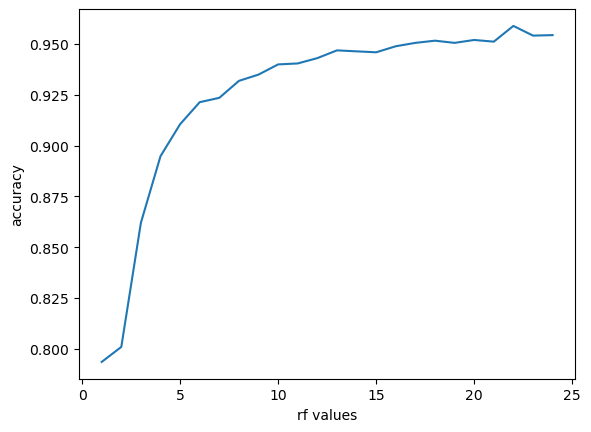

In [10]:
score_list = []
for each in range(1,25):
    rf2 = RandomForestClassifier(n_estimators = each)
    rf2.fit(X_train,Y_train)
    score_list.append(rf2.score(X_test,Y_test))
    
plt.plot(range(1,25),score_list)
plt.xlabel("rf values")
plt.ylabel("accuracy")
plt.show()